# Usiminas: Residência em Ciência de Dados

**Disciplina:** Probabilidade e Análise de Dados com Python

**Professores:** Flávio Figueiredo e Pedro Melo

**Aula 9:** Estudo de caso ENEM

# CADERNO DE EXERCÍCIOS - AULA 09

Utilizando as técnicas aprendidas até agora, analise os microdados do ENEM 2020 para responder às perguntas a seguir. Caso seja possível, gere visualizações apropriadas para cada uma delas.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
# Carregando o dataframe
# Encoding cp860 é o encoding para português. utf-8 não lê estes dados.
enem = pd.read_csv('http://dcc.ufmg.br/~flaviovdf/MICRODADOS_ENEM_2020_FILTRADOS.csv')

## 1. Quais os 5 estados brasileiros com maior taxa de ausência (geral) no ENEM 2020?


In [5]:
enem.head()

,NU_INSCRICAO,SG_UF_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_ANO_CONCLUIU,NU_NOTA_REDACAO,NU_NOTA_CN,TP_FAIXA_ETARIA,Q005,Q006,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_LC,TP_ESCOLA
0,200006271946,NaN,0,0,0,0,11,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,1
1,200001195856,NaN,1,1,1,1,11,580.0,604.1,11,NaN,NaN,711.3,661.7,595.3,1
2,200001943954,BA,0,0,0,0,0,NaN,NaN,4,3.0,B,NaN,NaN,NaN,2
3,200001908998,SP,1,1,1,1,0,760.0,620.8,2,NaN,NaN,759.4,675.0,624.2,2
4,200001634757,NaN,0,0,0,0,1,NaN,NaN,4,3.0,B,NaN,NaN,NaN,1


In [6]:
retorno = enem.groupby(['SG_UF_ESC'])[['TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT','TP_PRESENCA_CN']].sum().sum(axis='columns').sort_values(ascending=False)[0:5]
retorno.head()

SG_UF_ESC
SP    405662
CE    218536
MG    191532
RJ    166264
BA    130026
dtype: int64

## 2. Como a probabilidade de um(a) candidato(a) obter nota superior a 600 na redação varia com o tempo desde que ele(a) concluiu o segundo grau? Esta tendência é a mesma observada em Ciências da natureza?

**Ovservação:** O valor da coluna TP_ANO_CONCLUIU já indica o tempo desde a conclusão até prova. Entretanto, o valor 0 não necessariamente indica que o estudante concluiu em 2020! Elimine este valor para análises mais precisas.

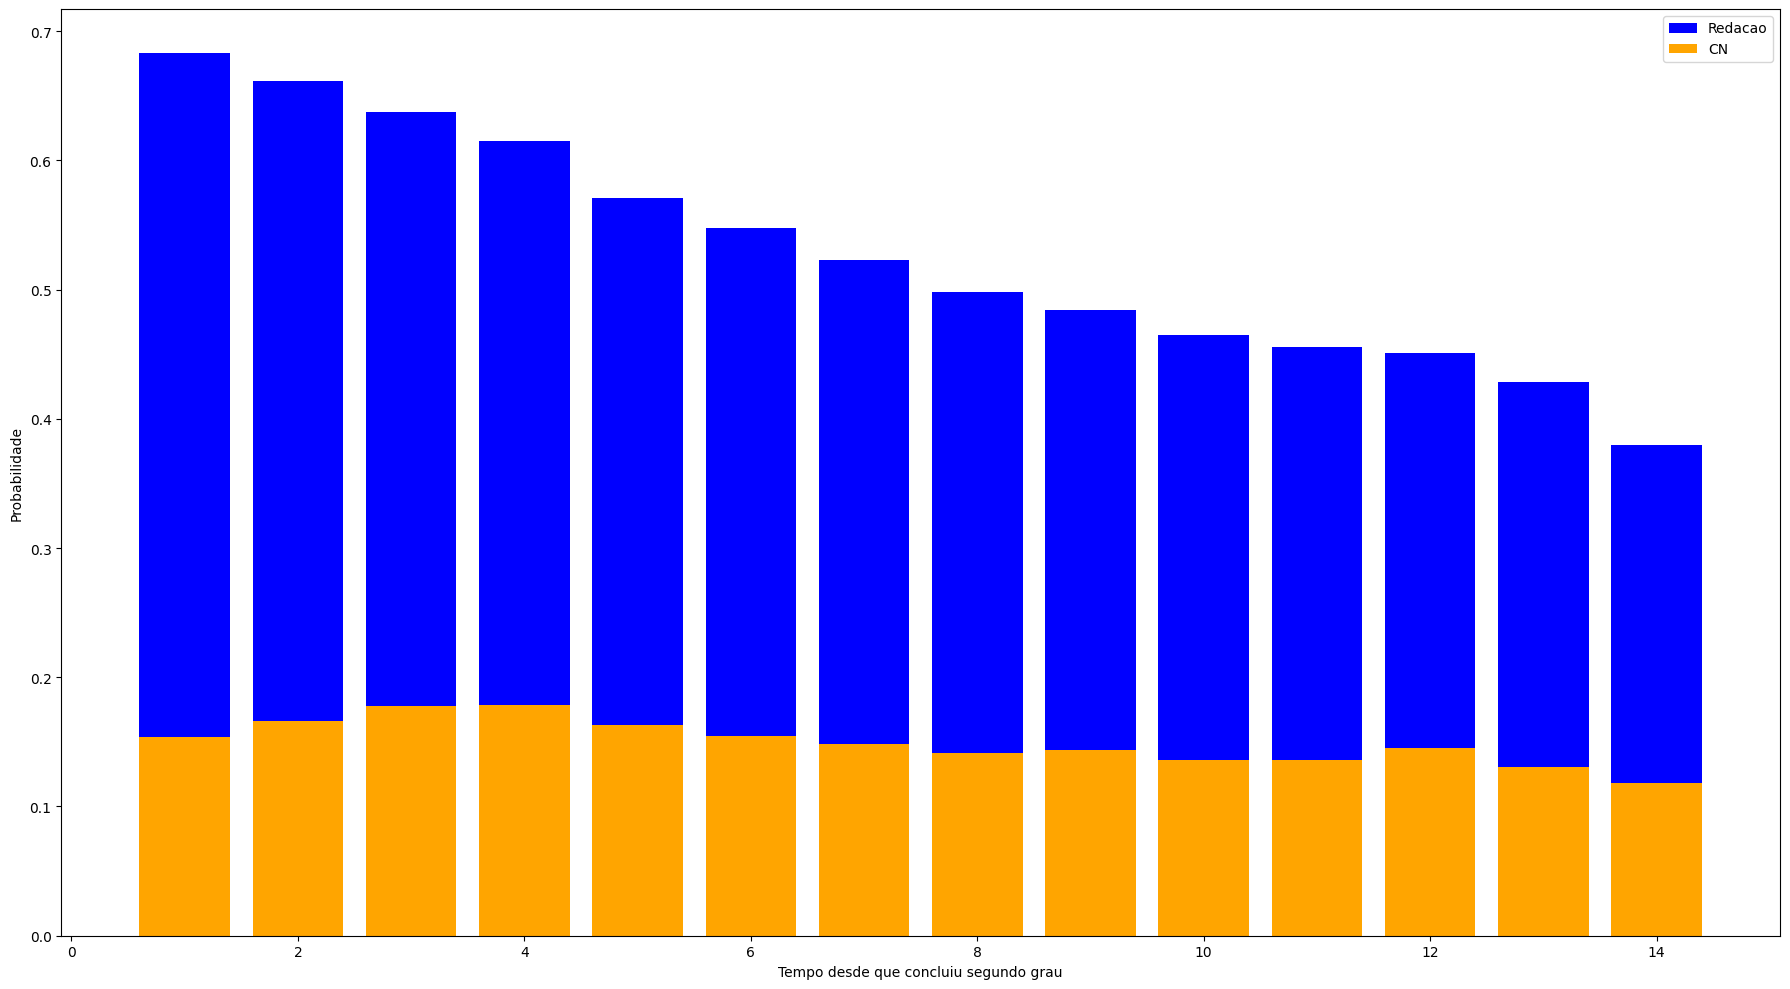

In [7]:
retorno_red = (enem[["TP_ANO_CONCLUIU","NU_NOTA_REDACAO"]].dropna().query('TP_ANO_CONCLUIU != 0 and NU_NOTA_REDACAO >= 600').groupby('TP_ANO_CONCLUIU').sum()/enem[["TP_ANO_CONCLUIU","NU_NOTA_REDACAO"]].dropna().query('TP_ANO_CONCLUIU != 0').groupby('TP_ANO_CONCLUIU').sum()).rename(columns={'NU_NOTA_REDACAO':'PROB_NOTA_RED>600'}).reset_index()
retorno_cn = (enem[["TP_ANO_CONCLUIU","NU_NOTA_CN"]].dropna().query('TP_ANO_CONCLUIU != 0 and NU_NOTA_CN >= 600').groupby('TP_ANO_CONCLUIU').sum()/enem[["TP_ANO_CONCLUIU","NU_NOTA_CN"]].dropna().query('TP_ANO_CONCLUIU != 0').groupby('TP_ANO_CONCLUIU').sum()).rename(columns={'NU_NOTA_CN':'PROB_NOTA_CN>600'}).reset_index()

plt.figure(figsize=(18,10))
plt.ylabel('Probabilidade')
plt.xlabel('Tempo desde que concluiu segundo grau')
plt.bar(retorno_red['TP_ANO_CONCLUIU'], retorno_red['PROB_NOTA_RED>600'], color='blue',label='Redacao')
plt.bar(retorno_cn['TP_ANO_CONCLUIU'], retorno_cn['PROB_NOTA_CN>600'], color='orange',label="CN")
plt.legend()
plt.tight_layout()
plt.show()

## 3. Como fatores como renda (Q006), número de pessoas que moram na mesma residência que o candidato (Q005), e a faixa etária (TP_FAIXA_ETARIA) do participante influenciam em sua nota em Matemática?

**Sugestões:** Para análises mais precisas, elimine as notas 0 e os candidatos que faltaram nas provas analisadas (ex:TP_PRESENCA_MT=0). Como as notas são uma escala contínua, você pode optar, se preferir, por torná-la discreta, criando classes que englobem faixas de notas (ex: 200<NU_NOTA_MT<400).

<AxesSubplot: xlabel='TP_FAIXA_ETARIA'>

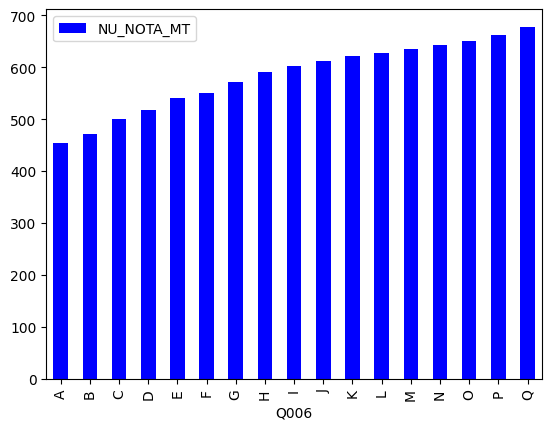

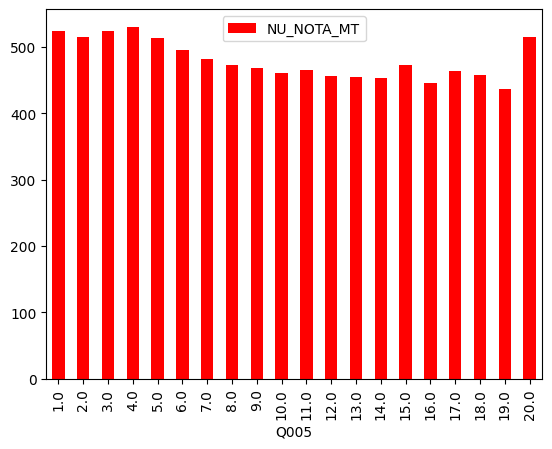

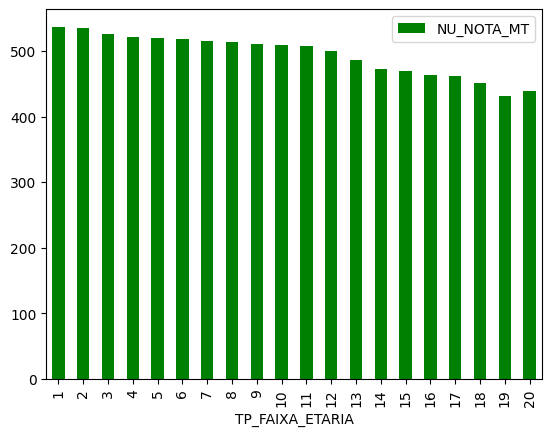

In [32]:
df = enem[["Q006","Q005","TP_FAIXA_ETARIA","NU_NOTA_MT"]].dropna()
renda = df[["Q006","NU_NOTA_MT"]].groupby("Q006").mean()
n_pessoas = df[["Q005","NU_NOTA_MT"]].groupby("Q005").mean()
faixa_etaria = df[["TP_FAIXA_ETARIA","NU_NOTA_MT"]].groupby("TP_FAIXA_ETARIA").mean()

renda.plot.bar(color='blue')
n_pessoas.plot.bar(color='red')
faixa_etaria.plot.bar(color='green')
